
#MNIST

## 1) classificar o MNIST usando rede Densa MLP
## 2) classificar o MNIST usando CNN
## 3) user transferência de aprendizado p/ classificar o MNIST

## Primeiro será exibido os gráficos de loss e acurácia para teste e treinamento da Rede Densa MLP e depois da CNN

#Filtrando a base de dados

In [28]:
import numpy as np
from sklearn.model_selection import train_test_split, cross_validate, KFold
from sklearn.metrics import make_scorer, accuracy_score
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.layers import Dense, Flatten, Conv2D
from tensorflow.keras import Model
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
print('X_train: ' + str(x_train.shape))
print('Y_train: ' + str(y_train.shape))
print('X_test:  '  + str(y_test.shape))
print('Y_test:  '  + str(y_test.shape))


11490434/11490434 [==============================] - 0s 0us/step
X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000,)
Y_test:  (10000,)


In [3]:
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [4]:
x_train, x_test = x_train / 255.0, x_test / 255.0

In [ ]:
#x_train=x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1)
#x_train=x_train / 255.0
#x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2], 1)
#x_test=x_test/255.0

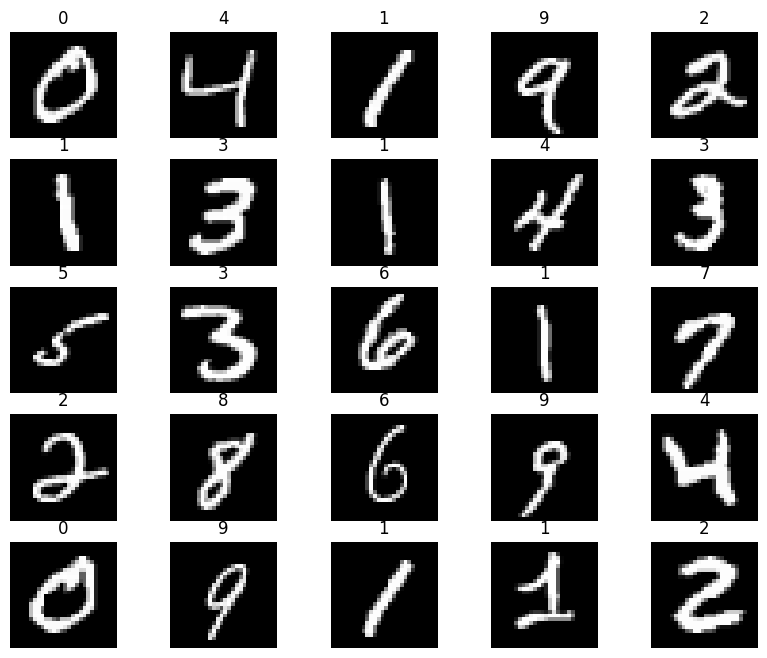

In [5]:
num = 26
imgs = x_train[:num]
lbls = y_train[:num]
figure = plt.figure(figsize=(10, 8))
cols, rows = 5, 5
for i in range(1, cols * rows + 1):
    figure.add_subplot(rows, cols, i)
    plt.title(lbls[i])
    plt.axis("off")
    plt.imshow(imgs[i], cmap='gray')
plt.show()

# Construindo a e testand a Rede Densa MLP

In [31]:
x_train = x_train.reshape((x_train.shape[0], -1))
x_test = x_test.reshape((x_test.shape[0], -1))

In [53]:

x_treino, x_val, y_treino, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(784,)))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(10, activation='softmax'))


model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [54]:

history = model.fit(x_treino, y_treino, epochs=10, validation_data=(x_val, y_val))


trained_accurr = history.history['accuracy']
val_accuracy = history.history['val_accuracy']


trained_loss = history.history['loss']
val_loss = history.history['val_loss']

Epoch 1/10
1500/1500 [==============================] - 11s 7ms/step - loss: 0.3256 - accuracy: 0.9064 - val_loss: 0.1498 - val_accuracy: 0.9580
Epoch 2/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.1564 - accuracy: 0.9541 - val_loss: 0.1143 - val_accuracy: 0.9676
Epoch 3/10
1500/1500 [==============================] - 5s 4ms/step - loss: 0.1183 - accuracy: 0.9649 - val_loss: 0.1008 - val_accuracy: 0.9686
Epoch 4/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0948 - accuracy: 0.9702 - val_loss: 0.0849 - val_accuracy: 0.9750
Epoch 5/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0807 - accuracy: 0.9750 - val_loss: 0.0810 - val_accuracy: 0.9758
Epoch 6/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0701 - accuracy: 0.9775 - val_loss: 0.0800 - val_accuracy: 0.9773
Epoch 7/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0604 - accuracy: 0.9808 - val_loss: 0.0811 - val_accuracy

In [56]:

print("PRINTANDO TESTE DA REDE DENSA\n")

tested = zip(trained_loss, trained_accurr)
trained = zip(val_loss, val_accuracy)

for epoch, test in enumerate(tested, 1):
        print(
        f'Epoch {epoch}, '
        f'Loss: {test[0]}, '
        f'Accuracy: {test[1]* 100}, '
    )

print("\nPRINTANDO TREINO DA REDE DENSA\n")

for epoch, train in enumerate(trained, 1):
    print(
        f'Epoch {epoch}, '
        f'Loss: {train[0]}, '
        f'Accuracy: {train[1] * 100}, '
    )


PRINTANDO TESTE DA REDE DENSA

Epoch 1, Loss: 0.3256103992462158, Accuracy: 90.63541889190674, 
Epoch 2, Loss: 0.15640757977962494, Accuracy: 95.40625214576721, 
Epoch 3, Loss: 0.11831831187009811, Accuracy: 96.48749828338623, 
Epoch 4, Loss: 0.09476462751626968, Accuracy: 97.01874852180481, 
Epoch 5, Loss: 0.08072734624147415, Accuracy: 97.49791622161865, 
Epoch 6, Loss: 0.07005807757377625, Accuracy: 97.75208234786987, 
Epoch 7, Loss: 0.06041007116436958, Accuracy: 98.0750024318695, 
Epoch 8, Loss: 0.05518085137009621, Accuracy: 98.20625185966492, 
Epoch 9, Loss: 0.04949546977877617, Accuracy: 98.41041564941406, 
Epoch 10, Loss: 0.04426446929574013, Accuracy: 98.55208396911621, 

PRINTANDO TREINO DA REDE DENSA

Epoch 1, Loss: 0.14976845681667328, Accuracy: 95.80000042915344, 
Epoch 2, Loss: 0.1143166795372963, Accuracy: 96.75833582878113, 
Epoch 3, Loss: 0.10077904909849167, Accuracy: 96.8583345413208, 
Epoch 4, Loss: 0.0849108099937439, Accuracy: 97.50000238418579, 
Epoch 5, Loss: 0

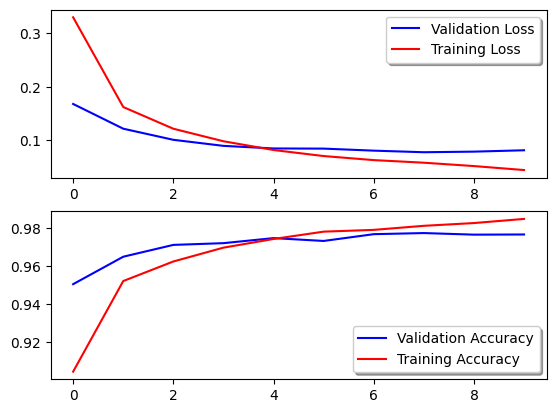

In [52]:
fig, ax = plt.subplots(2,1)
ax[0].plot(val_loss, color='b', label="Validation Loss")
ax[0].plot(trained_loss, color='r', label="Training Loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(val_accuracy, color='b', label="Validation Accuracy")
ax[1].plot(trained_accurr, color='r',label="Training Accuracy")
legend = ax[1].legend(loc='best', shadow=True)

#Construindo e testando CNN

In [6]:
class CNN(Model):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = Conv2D(32, 3, activation='relu')
        self.flatten = Flatten()
        self.d1 = Dense(128, activation='relu')
        self.d2 = Dense(10)
        pass
    def call(self, x):
        x = self.conv1(x)
        x = self.flatten(x)
        x = self.d1(x)
        return self.d2(x)
        pass
    pass

In [7]:
cnn = CNN()

In [8]:
x_train = x_train[..., tf.newaxis].astype("float32")
x_test = x_test[..., tf.newaxis].astype("float32")

In [9]:
loss_func = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
optimizer = tf.keras.optimizers.Adam()

In [10]:
train_loss = tf.keras.metrics.Mean(name='train_loss')
train_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='train_accuracy')
test_loss = tf.keras.metrics.Mean(name='test_loss')
test_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='test_accuracy')

In [11]:
train_ds = tf.data.Dataset.from_tensor_slices((x_train, y_train)).shuffle(10000).batch(32)
test_ds = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(32)

In [12]:
train_lossarr=[]
train_accuracyarr=[]

test_lossarr=[]
test_accuracyarr=[]

In [13]:
num_epochs = 10

In [55]:

def train(images, labels):
    with tf.GradientTape() as tape:
        predictions = cnn(images, training=True)
        loss = loss_func(labels, predictions)

        gradients = tape.gradient(loss, cnn.trainable_variables)
        optimizer.apply_gradients(zip(gradients, cnn.trainable_variables))
        train_loss(loss)
        train_accuracy(labels, predictions)
    pass

def test(images, labels):
    with tf.GradientTape() as tape:
      predictions = cnn(images, training=False)
      t_loss = loss_func(labels, predictions)
      gradients = tape.gradient(t_loss, cnn.trainable_variables)
      optimizer.apply_gradients(zip(gradients, cnn.trainable_variables))
      test_loss(t_loss)
      test_accuracy(labels, predictions)
    pass

In [15]:
for epoch in range(num_epochs):
    train_loss.reset_states()
    train_accuracy.reset_states()

    for images, labels in train_ds:
        train(images, labels)

    train_lossarr.append(train_loss.result())
    train_accuracyarr.append(train_accuracy.result() * 100)
    print(
        f'Epoch {epoch + 1}, '
        f'Loss: {train_loss.result()}, '
        f'Accuracy: {train_accuracy.result() * 100}, '
    )

Epoch 1, Loss: 0.13944850862026215, Accuracy: 95.75499725341797, 
Epoch 2, Loss: 0.043666381388902664, Accuracy: 98.66667175292969, 
Epoch 3, Loss: 0.023095494136214256, Accuracy: 99.25666809082031, 
Epoch 4, Loss: 0.015509597025811672, Accuracy: 99.4766616821289, 
Epoch 5, Loss: 0.00889092218130827, Accuracy: 99.67166900634766, 
Epoch 6, Loss: 0.00934501364827156, Accuracy: 99.69166564941406, 
Epoch 7, Loss: 0.005199074745178223, Accuracy: 99.81500244140625, 
Epoch 8, Loss: 0.006039218045771122, Accuracy: 99.78666687011719, 
Epoch 9, Loss: 0.004737067501991987, Accuracy: 99.84833526611328, 
Epoch 10, Loss: 0.003370265942066908, Accuracy: 99.88666534423828, 


In [26]:
for epoch in range(num_epochs):

    test_loss.reset_states()
    test_accuracy.reset_states()
    for test_images, test_labels in test_ds:
        test(test_images, test_labels)

    test_lossarr.append(test_loss.result())
    test_accuracyarr.append(test_accuracy.result() * 100)
    print(
        f'Epoch {epoch + 1}, '
        f'Test Loss: {test_loss.result()}, '
        f'Test Accuracy: {test_accuracy.result() * 100}'
    )

Epoch 1, Test Loss: 0.06717000901699066, Test Accuracy: 98.20999908447266
Epoch 2, Test Loss: 0.006012508179992437, Test Accuracy: 99.83000183105469
Epoch 3, Test Loss: 0.0005292168352752924, Test Accuracy: 100.0
Epoch 4, Test Loss: 0.00020416645566001534, Test Accuracy: 100.0
Epoch 5, Test Loss: 0.0001387725496897474, Test Accuracy: 100.0
Epoch 6, Test Loss: 0.00010129289148608223, Test Accuracy: 100.0
Epoch 7, Test Loss: 7.657318928977475e-05, Test Accuracy: 100.0
Epoch 8, Test Loss: 5.939384936937131e-05, Test Accuracy: 100.0
Epoch 9, Test Loss: 4.690268178819679e-05, Test Accuracy: 100.0
Epoch 10, Test Loss: 3.7552214052993804e-05, Test Accuracy: 100.0


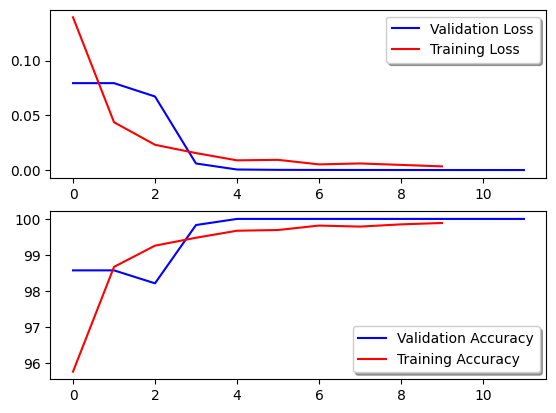

In [27]:
fig, ax = plt.subplots(2,1)
ax[0].plot(test_lossarr, color='b', label="Validation Loss")
ax[0].plot(train_lossarr, color='r', label="Training Loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(test_accuracyarr, color='b', label="Validation Accuracy")
ax[1].plot(train_accuracyarr, color='r',label="Training Accuracy")
legend = ax[1].legend(loc='best', shadow=True)
